In [1]:
import pandas as pd

In [2]:
reader = pd.read_csv("comentarios_por_pais.csv",sep = ";")

In [3]:
reader.head()

,pais,comentario
0,United States,PLEASE GO BACK TO CHRONOLOGICAL ORDER ON THE T...
1,Australia,Highly recommend
2,Singapore,"After many times I have tried, there still hav..."
3,Australia,"Love the filters, hate the non-chronological f..."
4,United Kingdom,"You can't even call this an app, it's the bigg..."


In [4]:
writer = reader

In [5]:
writer['longitud'] = writer['comentario'].apply(lambda x: len(str(x)))

In [6]:
writer.head()

,pais,comentario,longitud
0,United States,PLEASE GO BACK TO CHRONOLOGICAL ORDER ON THE T...,54
1,Australia,Highly recommend,16
2,Singapore,"After many times I have tried, there still hav...",140
3,Australia,"Love the filters, hate the non-chronological f...",51
4,United Kingdom,"You can't even call this an app, it's the bigg...",402


In [7]:
import matplotlib
import numpy as np
import matplotlib.pyplot as pl

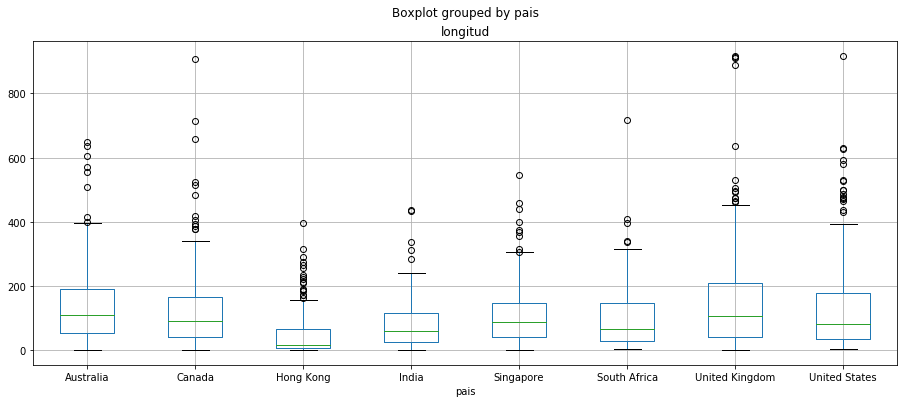

In [8]:
#grafico de longitud por pais
#el boxplot proporciona datos estadisticos como la mediana y los valores maximo y minimo de la longitud
bp = writer.boxplot(column='longitud', by='pais', figsize=(15, 6))

In [9]:
import math
def calcularEntropia(mensaje):
    mensajeList = list(mensaje)
    simbolosList = list(set(mensajeList))
    frecuencias = []
    for simbolo in simbolosList:
        cant = 0
        for simbolo2 in mensajeList:
            if simbolo == simbolo2:
                cant+=1
        frecuencias.append(float(cant) / len(mensajeList))
    entropia = 0.0
    for frec in frecuencias:
        entropia = entropia + frec * math.log(frec,2)
    entropia = -entropia
    return entropia

In [10]:
writer['entropia'] = writer['comentario'].apply(lambda x: calcularEntropia(str(x)))

In [11]:
writer.head()

,pais,comentario,longitud,entropia
0,United States,PLEASE GO BACK TO CHRONOLOGICAL ORDER ON THE T...,54,3.908766
1,Australia,Highly recommend,16,3.750000
2,Singapore,"After many times I have tried, there still hav...",140,4.066813
3,Australia,"Love the filters, hate the non-chronological f...",51,4.019863
4,United Kingdom,"You can't even call this an app, it's the bigg...",402,4.463797


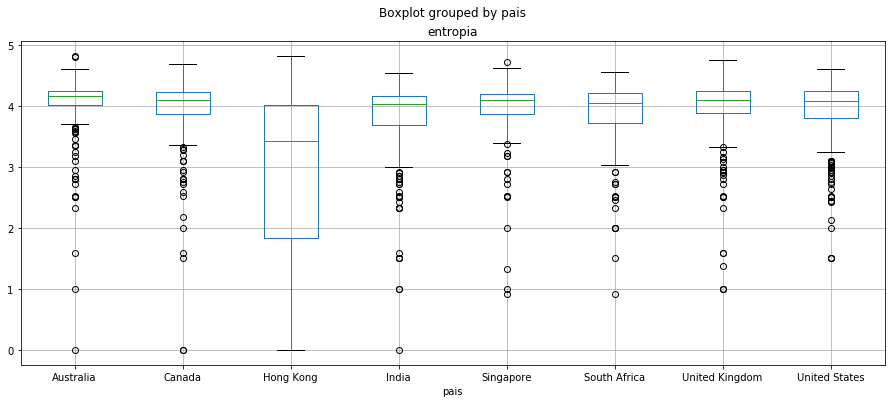

In [12]:
bp = writer.boxplot(column='entropia', by='pais', figsize=(15, 6))

### En base al Boxplot se puede apreciar que los mensajes de Hong Kong poseen menos entropía. 

(array([  18.,   21.,   13.,   34.,   26.,   78.,   95.,  238., 1003.,
         115.]),
 array([0.        , 0.48247425, 0.96494849, 1.44742274, 1.92989699,
        2.41237124, 2.89484548, 3.37731973, 3.85979398, 4.34226823,
        4.82474247]),
 <a list of 10 Patch objects>)

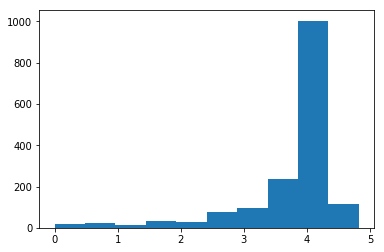

In [14]:
pl.hist(writer["entropia"])

### Sin Embargo los valores se distribuyen normalmente, por lo que se puede concluir que la entropía es similar en cada país.

In [15]:
writer.to_csv("datos_agregados.csv")

In [16]:
data = pd.read_csv("datos_agregados.csv")

In [17]:
data.head()

,Unnamed: 0,pais,comentario,longitud,entropia
0,0,United States,PLEASE GO BACK TO CHRONOLOGICAL ORDER ON THE T...,54,3.908766
1,1,Australia,Highly recommend,16,3.750000
2,2,Singapore,"After many times I have tried, there still hav...",140,4.066813
3,3,Australia,"Love the filters, hate the non-chronological f...",51,4.019863
4,4,United Kingdom,"You can't even call this an app, it's the bigg...",402,4.463797
